2024-08-15 11:49:59,789 - INFO - Loading the diabetes dataset
2024-08-15 11:49:59,797 - INFO - Dataset loaded with shape (442, 11)
2024-08-15 11:49:59,798 - INFO - Performing Exploratory Data Analysis (EDA)
2024-08-15 11:49:59,817 - INFO - Summary statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2         

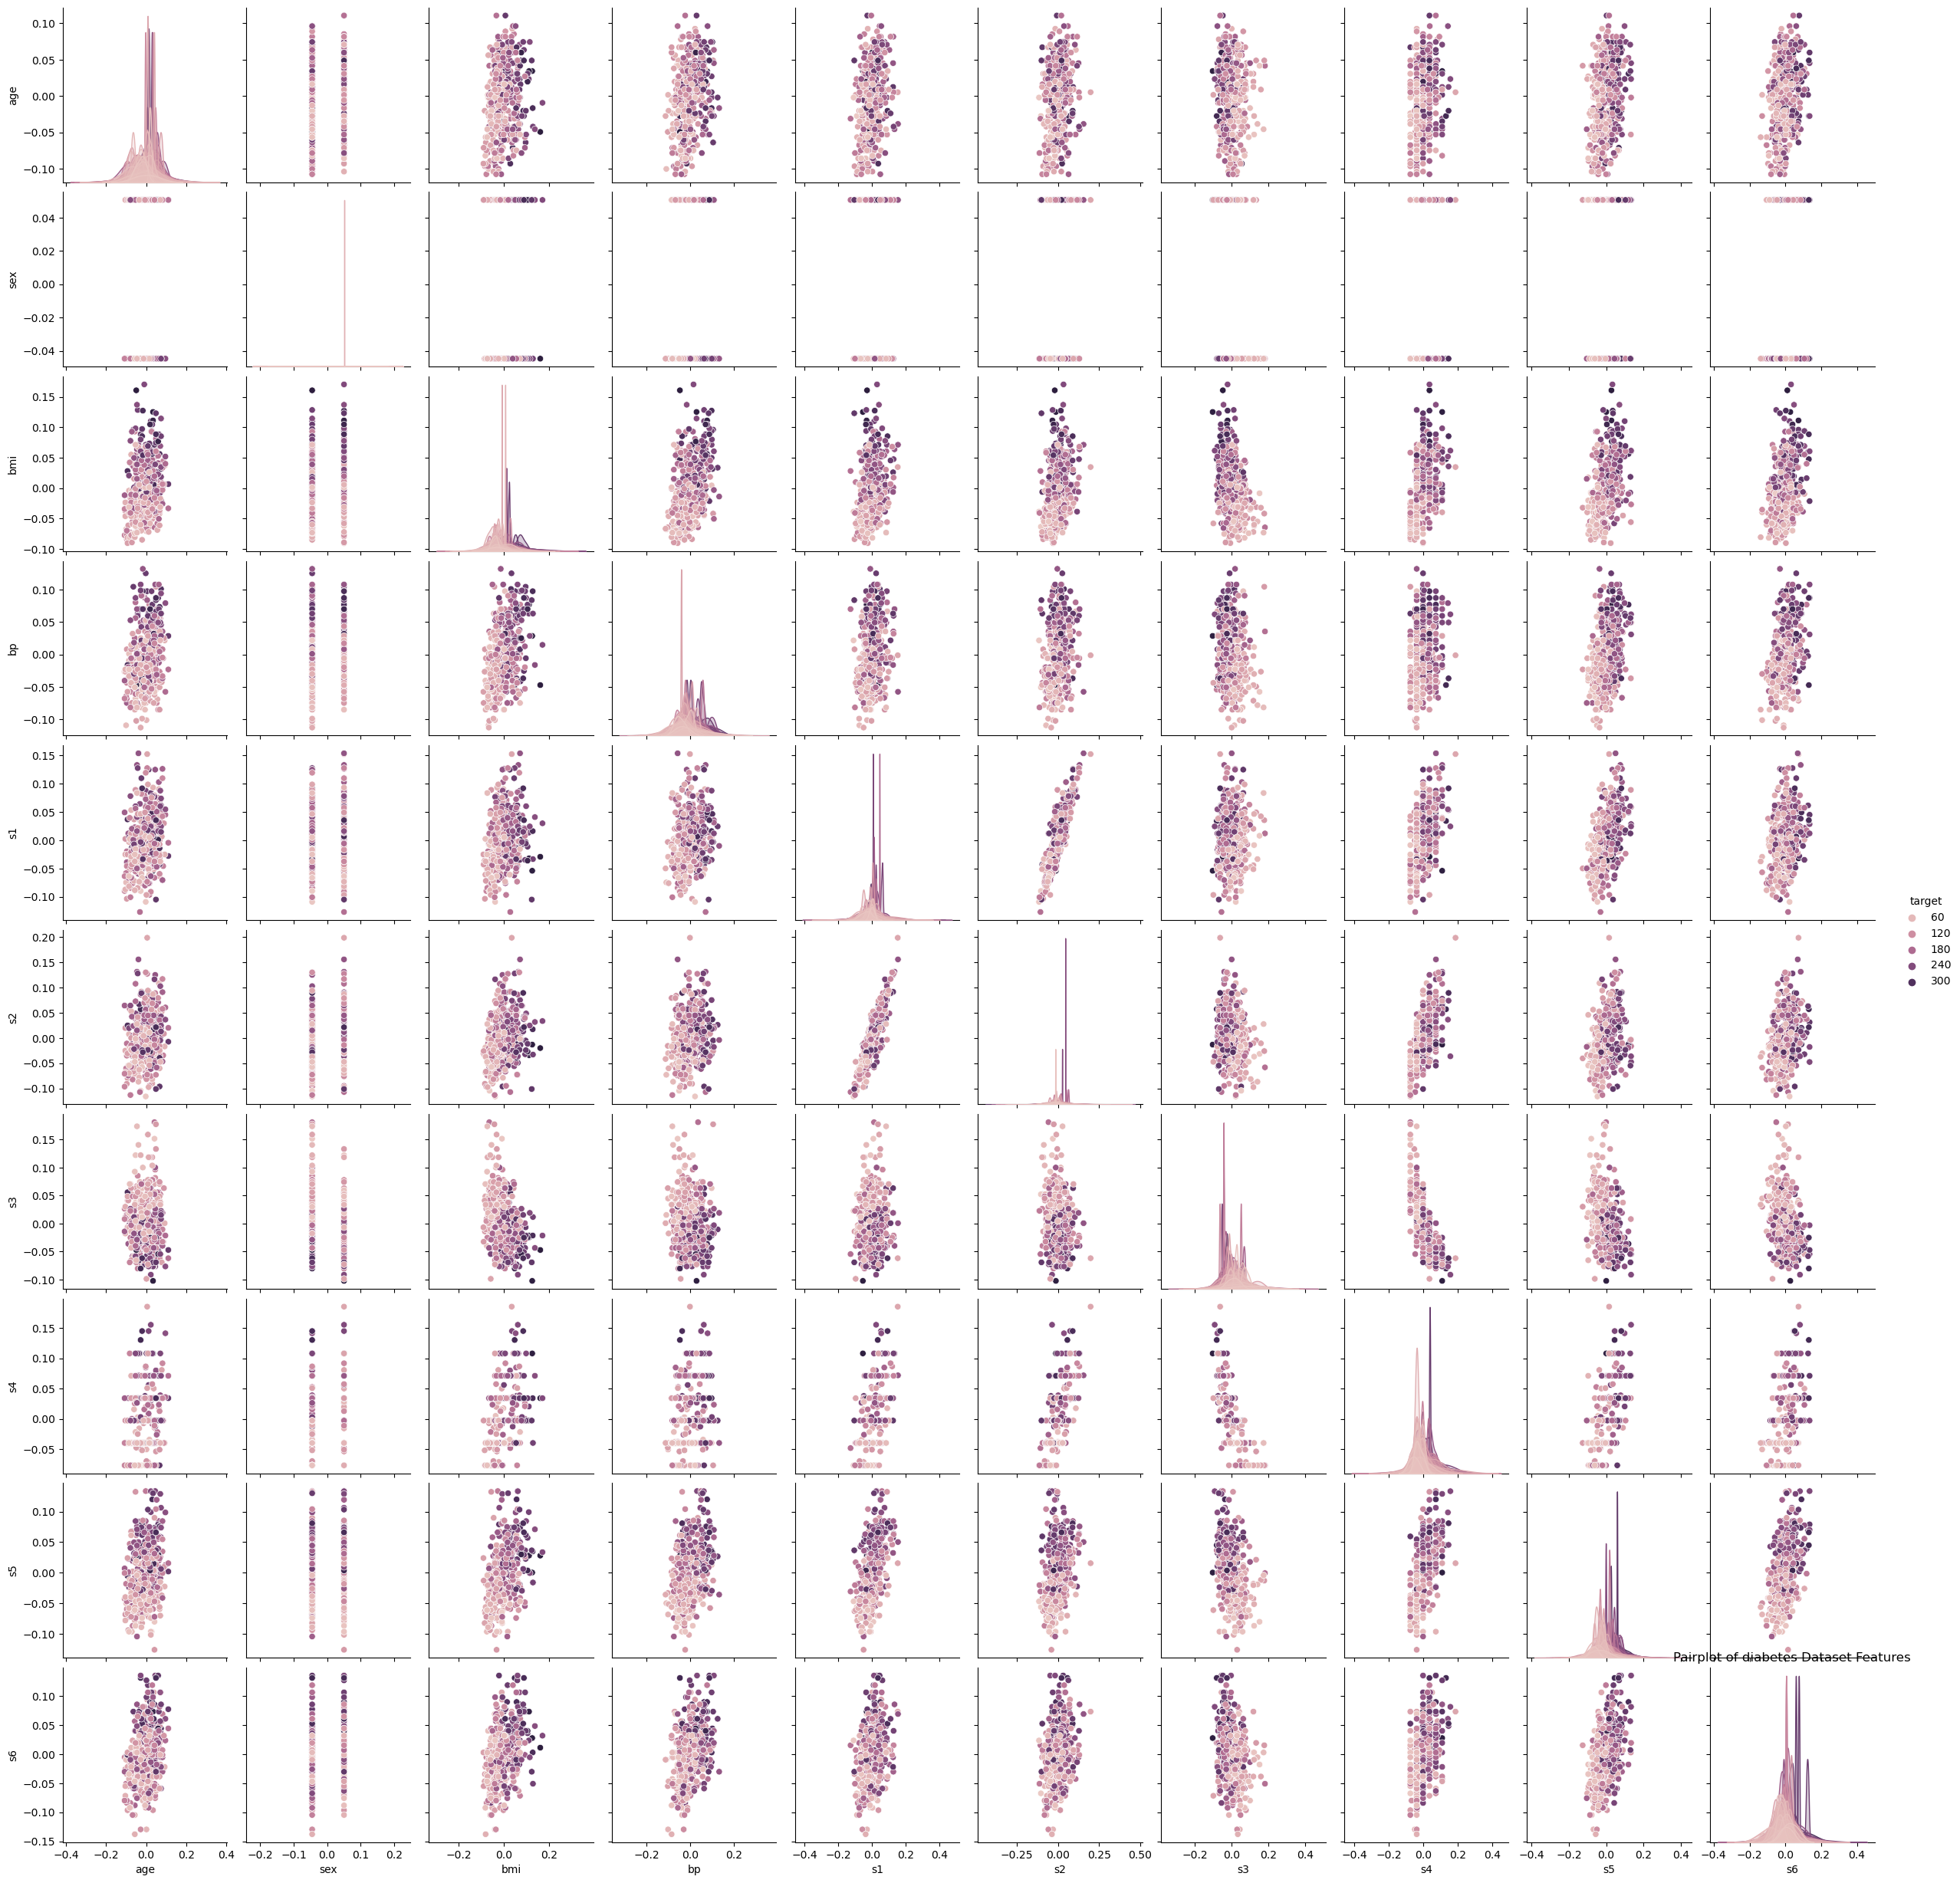

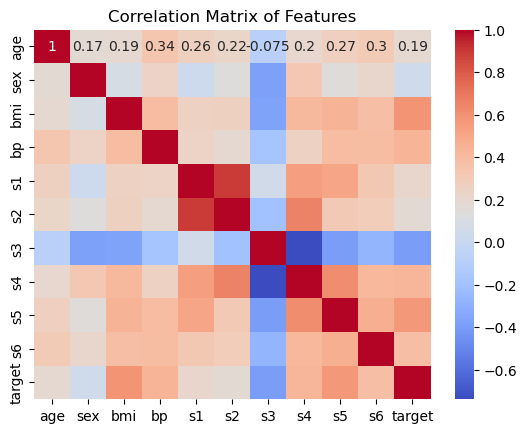

2024-08-15 11:50:27,306 - INFO - EDA complete
2024-08-15 11:50:27,306 - INFO - Preprocessing data - Standardizing the features
2024-08-15 11:50:27,310 - INFO - Data preprocessing complete
2024-08-15 11:50:27,311 - INFO - Training the Random Forest Classifier
2024-08-15 11:50:27,766 - INFO - Model training complete
2024-08-15 11:50:27,766 - INFO - Evaluating the model
2024-08-15 11:50:27,782 - INFO - Model Accuracy: 0.00%
2024-08-15 11:50:27,783 - INFO - Analyzing Feature Importance


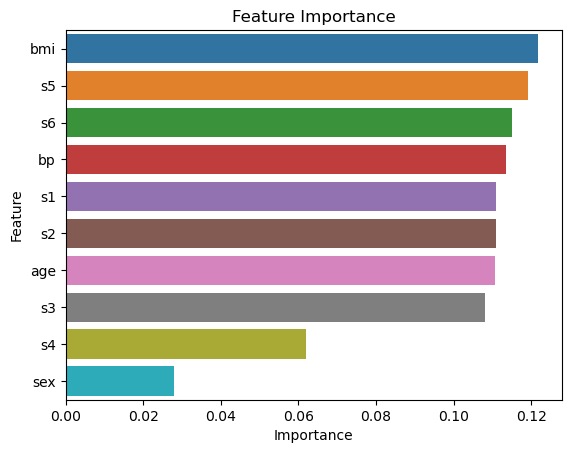

2024-08-15 11:50:27,910 - INFO - Feature Importance:
  Feature  Importance
2     bmi    0.121714
8      s5    0.119141
9      s6    0.114961
3      bp    0.113439
4      s1    0.110970
5      s2    0.110967
0     age    0.110728
6      s3    0.108081
7      s4    0.061943
1     sex    0.028056
2024-08-15 11:50:27,911 - INFO - Performing PCA for dimensionality reduction


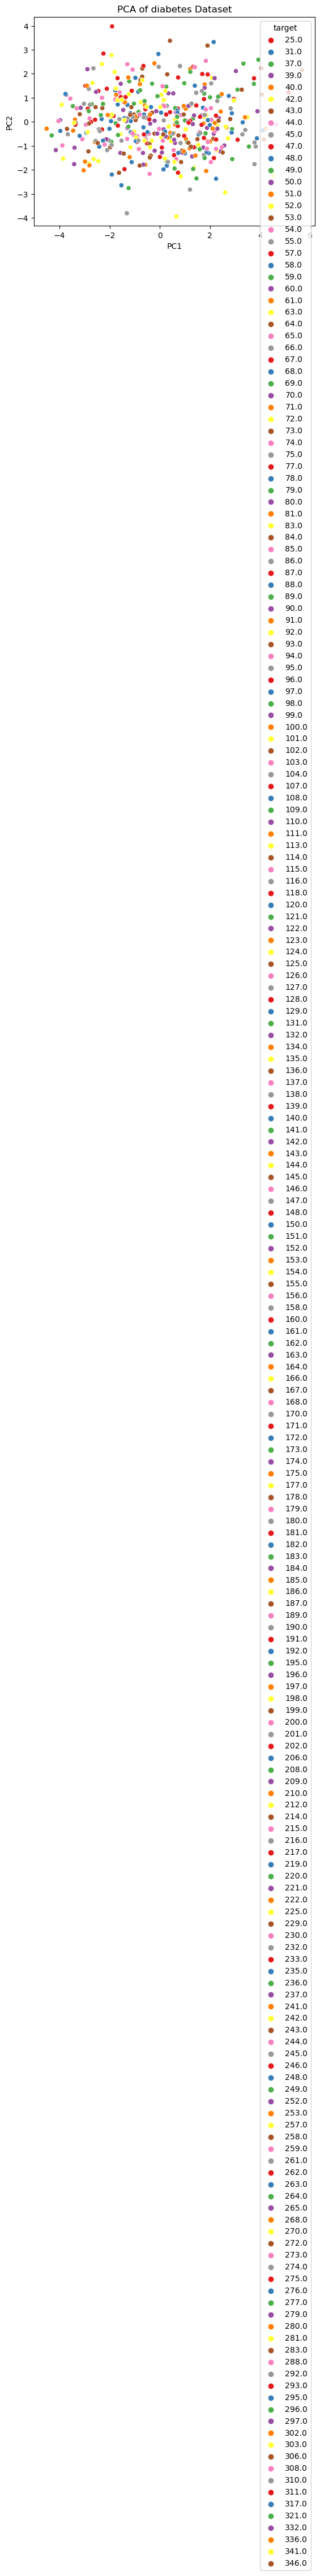

2024-08-15 11:50:30,532 - INFO - Final Model Accuracy: 0.00%


In [3]:
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 1. Load the diabetes Dataset and Convert to DataFrame
def load_dataset():
    logging.info("Loading the diabetes dataset")
    data = load_diabetes()
    X, y = data.data, data.target
    df = pd.DataFrame(X, columns=data.feature_names)
    df['target'] = y
    logging.info(f"Dataset loaded with shape {df.shape}")
    return df

# 2. Exploratory Data Analysis (EDA)
def perform_eda(df):
    logging.info("Performing Exploratory Data Analysis (EDA)")
    
    # Summary statistics
    summary_stats = df.describe()
    logging.info(f"Summary statistics:\n{summary_stats}")
    
    # Pairplot of features
    sns.pairplot(df, hue='target')
    plt.title("Pairplot of diabetes Dataset Features")
    plt.show()

    # Correlation matrix
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix of Features")
    plt.show()
    
    logging.info("EDA complete")

# 3. Preprocess the Data
def preprocess_data(df):
    logging.info("Preprocessing data - Standardizing the features")
    scaler = StandardScaler()
    features = df.columns[:-1]
    df[features] = scaler.fit_transform(df[features])
    logging.info("Data preprocessing complete")
    return df

# 4. Train the Model
def train_model(X_train, y_train):
    logging.info("Training the Random Forest Classifier")
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    logging.info("Model training complete")
    return model

# 5. Evaluate the Model
def evaluate_model(model, X_test, y_test):
    logging.info("Evaluating the model")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logging.info(f"Model Accuracy: {accuracy * 100:.2f}%")
    return accuracy

# 6. Feature Importance
def feature_importance(model, feature_names):
    logging.info("Analyzing Feature Importance")
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title("Feature Importance")
    plt.show()
    
    logging.info(f"Feature Importance:\n{feature_importance_df}")

# 7. Dimensionality Reduction and Visualization (PCA)
def visualize_pca(X, y):
    logging.info("Performing PCA for dimensionality reduction")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['target'] = y
    
    sns.scatterplot(x='PC1', y='PC2', hue='target', palette='Set1', data=df_pca)
    plt.title("PCA of diabetes Dataset")
    plt.show()

# 8. Main function to run the analysis and extract insights
def main():
    # Load dataset
    df = load_dataset()
    
    # Perform EDA
    perform_eda(df)
    
    # Preprocess data
    df = preprocess_data(df)
    
    # Split the data into train and test sets
    X = df.iloc[:, :-1].values
    y = df['target'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = train_model(X_train, y_train)
    
    # Evaluate the model
    accuracy = evaluate_model(model, X_test, y_test)
    
    # Analyze feature importance
    feature_importance(model, df.columns[:-1])
    
    # Visualize data with PCA
    visualize_pca(X, y)
    
    logging.info(f"Final Model Accuracy: {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()
